# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats

# Load json file
#json_data = json.load((open('/Users/HF/Documents/Education/Springboard/999_HBD_EDA/world_bank_projects.json')))

df = pd.read_csv('data/human_body_temperature.csv')
# df = pd.read_csv('/Users/HF/Documents/Education/Springboard/999_HBD_EDA/human_body_temperature.csv')
print (df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


## 1) Is the distribution of body temperatures normal?
We will apply 2 tests:
+ Visual Test (histogram)
+ Shapiro-Wilk Test

Answer:
+ the histogram looks more or less normal, let's apply Shapiro-Wilk test to confirm normailty
(see results below).

Sample mean =98.249 degrees F
Sample standard deviation =0.73 degrees F


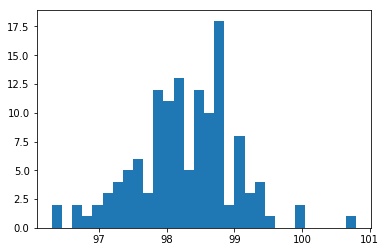

Statistics=0.987, p=0.233
Sample looks normally distributed (fail to reject H0)


In [143]:
# Calculate mean and standard deviation of the sample
temp_sample_mean=np.mean(df['temperature'])
print("Sample mean ="+str(np.round(temp_sample_mean,3))+" degrees F")
temp_sample_std=np.std(df['temperature'])
print("Sample standard deviation ="+str(np.round(temp_sample_std,3))+" degrees F")

# Histogram
plt.hist(df['temperature'], bins = 30)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
 print('Sample looks normally distributed (fail to reject H0)')
else:
 print('Sample does not look normally distributed (reject H0)')


# 2)
# Are the observations independent?
Answer: in the ata description it says that the data is random, therefore
it is safe to assume that the data is independent

# Is the sample size large? 
Answer: In general a sample size of 30 is considered sufficient. Our sample size n=130, therefore is large enough.
The smaple size also meets the 10% condition. The test was done in 1992. Assuming that
the world's population at the time was 4bn, 130 datapoint is a small fraction of a percent.

In [144]:
sample_size=len(df['temperature'])
print("Sample size =", sample_size)

Sample size = 130


# 3) Is the true population mean really 98.6 degrees F?
+ First, try a bootstrap hypothesis test.
+ Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
+ In this situation, is it appropriate to use the  t- or z- statistic?
+ Now try using the other test. How is the result be different? Why?

The hypothesis:
+ H0: populastion mean = 98.6 F
+ H1: populastion mean <> 98.6 F

# Bootstrap testing:

In [145]:
translated_temp = df['temperature'] - temp_sample_mean + 98.6
bs_replicates = np.empty(10000)

# Generate replicates
for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(df['temperature'], size=sample_size))
    
p_1 = np.sum(bs_replicates <= temp_sample_std) / 10000
print("Bootstrap p-value =", p_1)

if p_1 > alpha:
 print('Populastion mean = 98.6 F (fail to reject H0)')
else:
 print('Populastion mean <> 98.6  F (reject H0)')

Bootstrap p-value = 0.0
Populastion mean <> 98.6  F (reject H0)


# Frequentist statistical testing:

We are treating everyone as being in the same group, with one mean using a one-sample test (sonce we have only one sample). The population standard deviation is not given, so we assume it is not known. The sample standard deviation is known from the data and we know that the sample size is large enough for CLT to apply, so we can use a  z-test.


In [146]:
z = (temp_sample_mean - 98.6)/(temp_sample_std / np.sqrt(sample_size))
print ("z-value =", z)

p_2 = stats.norm.cdf(z) * 2
print ("p-value =", p_2)

if p_2 > alpha:
 print('Populastion mean = 98.6 F (fail to reject H0)')
else:
 print('Populastion mean <> 98.6 F (reject H0)')

z-value = -5.475925202078116
p-value = 4.3523151658821886e-08
Populastion mean <> 98.6 F (reject H0)


# In this situation, is it appropriate to use the t- or z- statistic?
It is appropriate to use z-test, since the sample size is greater than 30.


# t-test
p value of t-test is larger than z-test (see below). This means that t-test factors in the greater uncertainty of estimating the standard deviation than the z-test.

In [147]:
# t-test p-value:
p_3=stats.t.sf(abs(z),130)*2

print ("p-value =", p_3)

if p_3 > alpha:
 print('Populastion mean = 98.6 F (fail to reject H0)')
else:
 print('Populastion mean <> 98.6 F (reject H0)')

p-value = 2.165141048166529e-07
Populastion mean <> 98.6 F (reject H0)


# 4) Draw a small sample of size 10 from the data and repeat both frequentist tests
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡
t
  and  𝑧
z
  statistic?

In [148]:
sample_10 = np.random.choice(df['temperature'], size=10)

sample_10_mean=np.mean(sample_10)
sample_10_std=np.std(sample_10)
test_stat_10=(sample_10_mean-98.6)/(sample_10_std/np.sqrt(130))
p_z_1=pval_z=stats.norm.cdf(test_stat_10)*2
print('The z-test p-value ='+str(p_z_1)+'.')
p_t_1=stats.t.sf(abs(test_stat_10),9)*2
print('The t-test p-value ='+ str(p_t_1)+'.')

The z-test p-value =1.185141056050877e-10.
The t-test p-value =0.00011936061606303511.


Considering that the sample size is less than 30, in this case it would be correct to use t-test, and not the z-test.
Obtained p-value of t-test is larger than the p-value of z-test (see above). This means that t-test (conisdering the smaller sample size) factors in the greater uncertainty of estimating the standard deviation than the z-test.

# 5) At what temperature should we consider someone's temperature to be "abnormal"?
+ As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

Let's give definition of abnormal temerature. In our case abnormal temeprature will be the one that is otside of 95% confidence interval.

In [149]:
# Bootstrapped approach
bs_replicates = np.empty(10000)

# Generate replicates
for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(df['temperature'], size=sample_size))
    
bs_conf_interval=np.percentile(bs_replicates, [2.5,97.5])
print('Bootstrap 95% confidence interval: ['+ str(bs_conf_interval[0])+" - "+str(bs_conf_interval[1])+"]")

Bootstrap 95% confidence interval: [98.12384615384615 - 98.37307692307692]


In [150]:
# Frequentist approach
z_star=stats.norm.ppf(.975)
Margin_of_Error=z_star*temp_sample_std
conf_interval=np.array([temp_sample_mean-Margin_of_Error,temp_sample_mean+Margin_of_Error])
print('Frequentist confidence interval: ['+str(conf_interval[0])+", "+str(conf_interval[1])+"]")

Frequentist confidence interval: [96.81775582674824, 99.68070571171332]


# 6) Is there a significant difference between males and females in normal temperature?

Let's use a frequentist hypothesis test for the difference of means to test whether there is a significant difference between males and females in normal temperature.

+ H0 = Male and female body temperature means are the same
+ H1 = Male and female body temperature means are not the same

Let's check whether sample sizes for male and female body temperatures are large enough to apply Central Limit Theorem.


In [151]:
male_temp=df[df.gender=='M']['temperature']
female_temp=df[df.gender=='F']['temperature']
male_sample_size=len(male_temp)
female_sample_size=len(female_temp)
print("Sampling distribution sample size of male body temperatures =", male_sample_size)
print("Sampling distribution sample size of female body temperatures =", female_sample_size)

Sampling distribution sample size of male body temperatures = 65
Sampling distribution sample size of female body temperatures = 65


Both sample sizes are > 30 and we can apply CLT.

In [152]:
temp_male_mean=np.mean(male_temp)
temp_female_mean=np.mean(female_temp)
temp_male_std=np.std(male_temp)
temp_female_std=np.std(female_temp)
diff_mean=temp_female_mean-temp_male_mean
diff_std=np.sqrt((temp_male_std**2/len(male_temp))+(temp_female_std**2/len(female_temp)))
print("The difference of the distributions has a mean -", (np.round(diff_mean,4)), \
      ", and a standard deviation -", str(np.round(diff_std,4)))

The difference of the distributions has a mean - 0.2892 , and a standard deviation - 0.1256


Now, let's calculate the likelihood of getting this value of difference of means

In [153]:
p_4=(1-stats.norm.cdf(diff_mean,scale=diff_std))*2

if p_4 > alpha:
 print('Male and female body temperature means are the same (fail to reject H0)')
else:
 print('Male and female body temperature means are not the same (reject H0)')


Male and female body temperature means are not the same (reject H0)


# Conclusion

The initial report stated that the mean normal body temperature was held to be 98.6 degree F for more than 120 years. However, our analysis shows that the mean body temperature is lower and lies within 98.12 to 98.37 deg F.

We can also see that there is difference between males and females in normal temperature.